# Day 21 Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Linear Regression.xlsx', sheet_name = 0)
data.head(3)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0


In [3]:
data.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [4]:
data.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.00,450000.00,645000.0,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5


# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8082bbb050>,
      dtype=object)

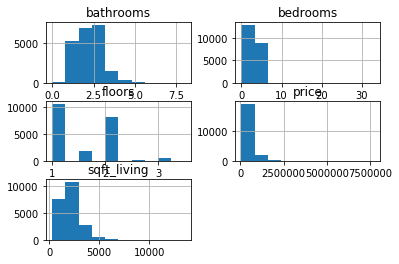

In [6]:
data.hist()

In [7]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


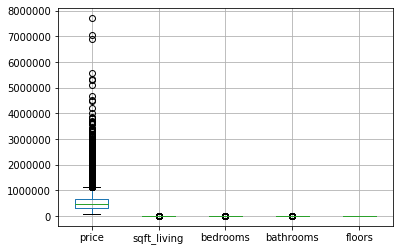

In [8]:
data.boxplot()

In [9]:
j = data.price[(data.price >= 15000000)& (data.price<=8000000)]
j.head()


Series([], Name: price, dtype: int64)

In [10]:
j.head()

Series([], Name: price, dtype: int64)

In [11]:
y = data.iloc[:, :1]
y.head(2)

,price
0,221900
1,538000


In [12]:
x = data.iloc[:,1:2]
x.head(2)

,sqft_living
0,1180
1,2570


# Split the records for training & testing

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.2, random_state =2)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17290, 1), (4323, 1), (17290, 1), (4323, 1))

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [16]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lin_reg.coef_

array([[280.67382569]])

In [18]:
lin_reg.intercept_

array([-42568.70358496])

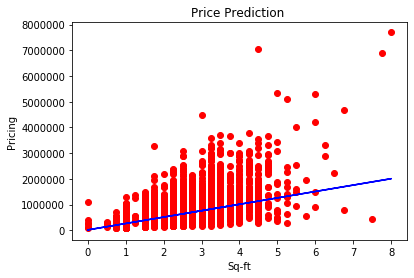

In [60]:
plt.scatter(x_train,y_train, color = 'red')
plt.plot(x_train, lin_reg.predict(x_train),color='blue')
plt.title('Price Prediction ')
plt.xlabel('Sq-ft')
plt.ylabel('Pricing')
plt.show()

In [20]:
ypred = lin_reg.predict(x_test)
ypred

array([[633855.21632509],
       [566493.49815977],
       [364408.34366382],
       ...,
       [701216.9344904 ],
       [187583.83347987],
       [465450.9209118 ]])

In [21]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [22]:
x_test.head()

,sqft_living
6638,2410
7366,2170
3158,1450
9117,4500
3392,860


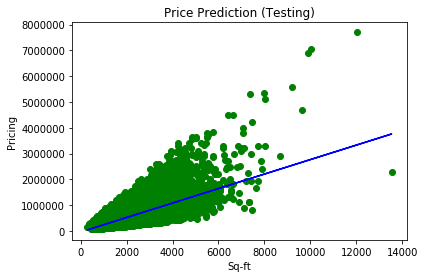

In [23]:
plt.scatter(x,y, color = 'green')
plt.plot(x_test,lin_reg.predict(x_test), color = 'blue')
plt.title('Price Prediction (Testing)')
plt.xlabel('Sq-ft')
plt.ylabel('Pricing')
plt.show()

In [24]:
from sklearn.metrics import r2_score, mean_squared_error
print("R Square value is  " , r2_score(y_test,ypred))
print("Mean Square value is ", np.sqrt(mean_squared_error(y_test,ypred)))

R Square value is   0.5031163723285275
Mean Square value is  263380.00189817196


#  Linear Regression BedRoom with Price Comparision

In [25]:
data.head(2)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0


In [26]:
a = data.iloc[:,2:3]
a.head(2)

,bedrooms
0,3
1,3


In [27]:
y.head(2)

,price
0,221900
1,538000


## Split the data 

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(a,y, test_size = 0.2, random_state=2)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17290, 1), (4323, 1), (17290, 1), (4323, 1))

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [32]:

lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lin_reg.coef_

array([[118660.62797869]])

In [36]:

lin_reg.intercept_

array([139952.87593386])

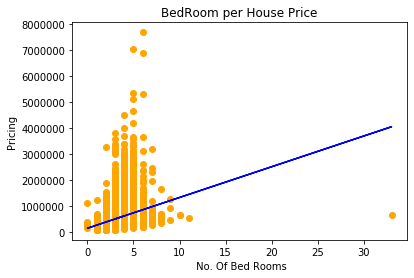

In [39]:
plt.scatter(x_train,y_train, color = 'orange')
plt.plot(x_train, lin_reg.predict(x_train), color = 'blue')
plt.title("BedRoom per House Price")
plt.xlabel(" No. Of Bed Rooms")
plt.ylabel("Pricing")
plt.show()

In [42]:
ypred = lin_reg.predict(x_test)


In [44]:
ypred

array([[614595.3878486 ],
       [495934.75986992],
       [377274.13189123],
       ...,
       [614595.3878486 ],
       [377274.13189123],
       [614595.3878486 ]])

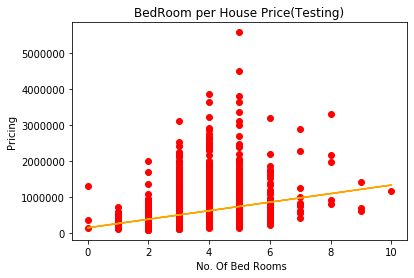

In [45]:
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test, lin_reg.predict(x_test), color = 'orange')
plt.title("BedRoom per House Price(Testing)")
plt.xlabel(" No. Of Bed Rooms")
plt.ylabel("Pricing")
plt.show()

In [46]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


In [50]:
from sklearn.metrics import mean_squared_error,r2_score
print("R Square Value: ", r2_score(y_test,ypred))
print("Mean Square value : " ,np.sqrt(mean_squared_error(y_test, ypred)))


R Square Value:  0.10886345250291585
Mean Square value :  352717.9654187645


# Linear Regression For Price Bathroom

In [52]:
b = data.iloc[:,3:4]
b.head(2)

,bathrooms
0,1.00
1,2.25


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(b,y, test_size = 0.2, random_state=2)

In [54]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [55]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lin_reg.coef_

array([[249143.95803858]])

In [57]:
lin_reg.intercept_

array([13073.99575289])

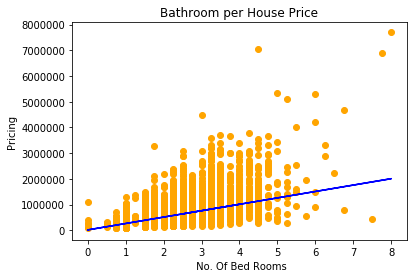

In [59]:
plt.scatter(x_train,y_train, color = 'orange')
plt.plot(x_train, lin_reg.predict(x_train), color = 'blue')
plt.title("Bathroom per House Price")
plt.xlabel(" No. Of Bed Rooms")
plt.ylabel("Pricing")
plt.show()

In [61]:
ypred = lin_reg.predict(x_test)
ypred

array([[573647.90133969],
       [386789.93281076],
       [262217.95379147],
       ...,
       [635933.89084934],
       [262217.95379147],
       [698219.88035898]])

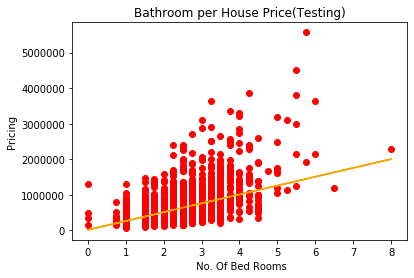

In [62]:
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test, lin_reg.predict(x_test), color = 'orange')
plt.title("Bathroom per House Price(Testing)")
plt.xlabel(" No. Of Bed Rooms")
plt.ylabel("Pricing")
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error,r2_score
print("R Square Value: ", r2_score(y_test,ypred))
print("Mean Square value : " ,np.sqrt(mean_squared_error(y_test, ypred)))

R Square Value:  0.28122887124177365
Mean Square value :  316774.90190998075


# Linear Regression for Floor and Price

In [64]:
b = data.iloc[:,4:]
b.head(2)

,floors
0,1.0
1,2.0


In [65]:
y.head(2)

,price
0,221900
1,538000


In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(b,y, test_size = 0.2, random_state=2)

In [67]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [68]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
lin_reg.coef_

array([[171376.44562902]])

In [70]:
lin_reg.intercept_

array([283309.93245028])

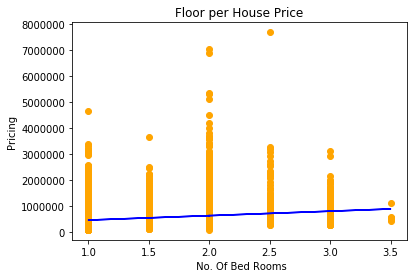

In [71]:
plt.scatter(x_train,y_train, color = 'orange')
plt.plot(x_train, lin_reg.predict(x_train), color = 'blue')
plt.title("Floor per House Price")
plt.xlabel(" No. Of Bed Rooms")
plt.ylabel("Pricing")
plt.show()

In [72]:
ypred = lin_reg.predict(x_test)
ypred

array([[540374.60089382],
       [454686.37807931],
       [454686.37807931],
       ...,
       [626062.82370833],
       [454686.37807931],
       [540374.60089382]])

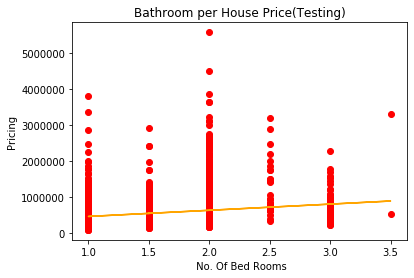

In [73]:
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test, lin_reg.predict(x_test), color = 'orange')
plt.title("Bathroom per House Price(Testing)")
plt.xlabel(" No. Of Bed Rooms")
plt.ylabel("Pricing")
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error,r2_score
print("R Square Value: ", r2_score(y_test,ypred))
print("Mean Square value : " ,np.sqrt(mean_squared_error(y_test, ypred)))

R Square Value:  0.0733487976687478
Mean Square value :  359677.77234107786
